 Successfully loaded city_day.csv

Delhi PM2.5 data is ready for analysis. Here's a preview:
             City   PM2.5    PM10     NO    NO2     NOx     NH3     CO   SO2  \
Date                                                                           
2015-01-01  Delhi  313.22  607.98  69.16  36.39  110.59   33.85  15.20  9.25   
2015-01-02  Delhi  186.18  269.55  62.09  32.87   88.14   31.83   9.54  6.65   
2015-01-03  Delhi   87.18  131.90  25.73  30.31   47.95   69.55  10.61  2.65   
2015-01-04  Delhi  151.84  241.84  25.01  36.91   48.62  130.36  11.54  4.63   
2015-01-05  Delhi  146.60  219.13  14.01  34.92   38.25  122.88   9.20  3.33   

               O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
Date                                                           
2015-01-01  41.68    14.36    24.86    9.84  472.0     Severe  
2015-01-02  29.97    10.55    20.09    4.29  454.0     Severe  
2015-01-03  19.71     3.91    10.23    1.99  143.0   Moderate  
2015-01-04  25.36     4.26

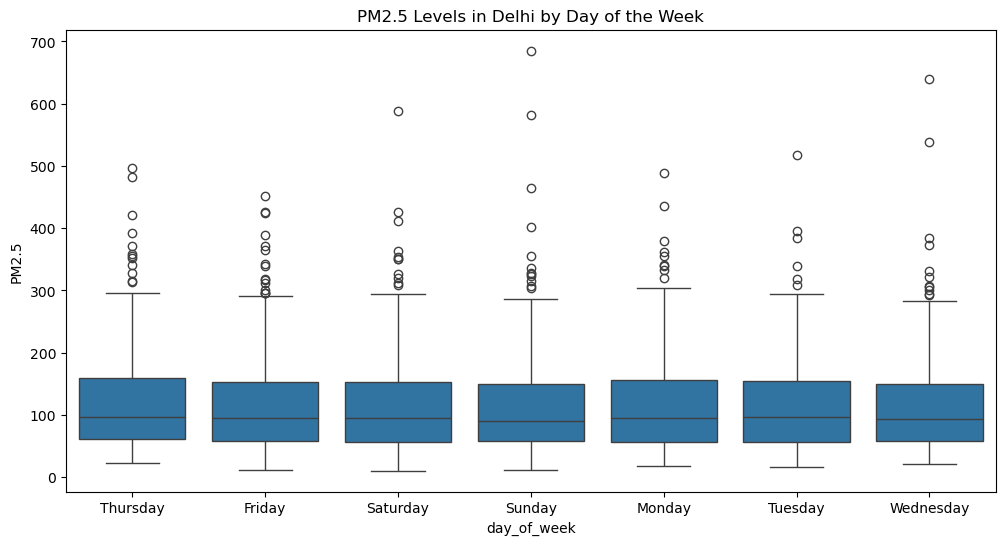

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


try:
    full_df = pd.read_csv('city_day.csv')
    print(" Successfully loaded city_day.csv")
except FileNotFoundError:
    print("Error: 'city_day.csv' not found. Please download it from Kaggle and place it in your project folder.")

# Convert 'Date' to datetime objects
full_df['Date'] = pd.to_datetime(full_df['Date'])

# Filter for Delhi data only
aqi_df = full_df[full_df['City'] == 'Delhi'].copy()

# Drop rows where we don't have PM2.5 data
aqi_df.dropna(subset=['PM2.5'], inplace=True)

# Set the date as the index
aqi_df.set_index('Date', inplace=True)

print("\nDelhi PM2.5 data is ready for analysis. Here's a preview:")
print(aqi_df.head())

aqi_df['day_of_week'] = aqi_df.index.day_name()
aqi_df['month'] = aqi_df.index.month

print("\nData with new features:")
print(aqi_df[['PM2.5', 'day_of_week', 'month']].head())

plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='PM2.5', data=aqi_df)
plt.title('PM2.5 Levels in Delhi by Day of the Week')
plt.show()

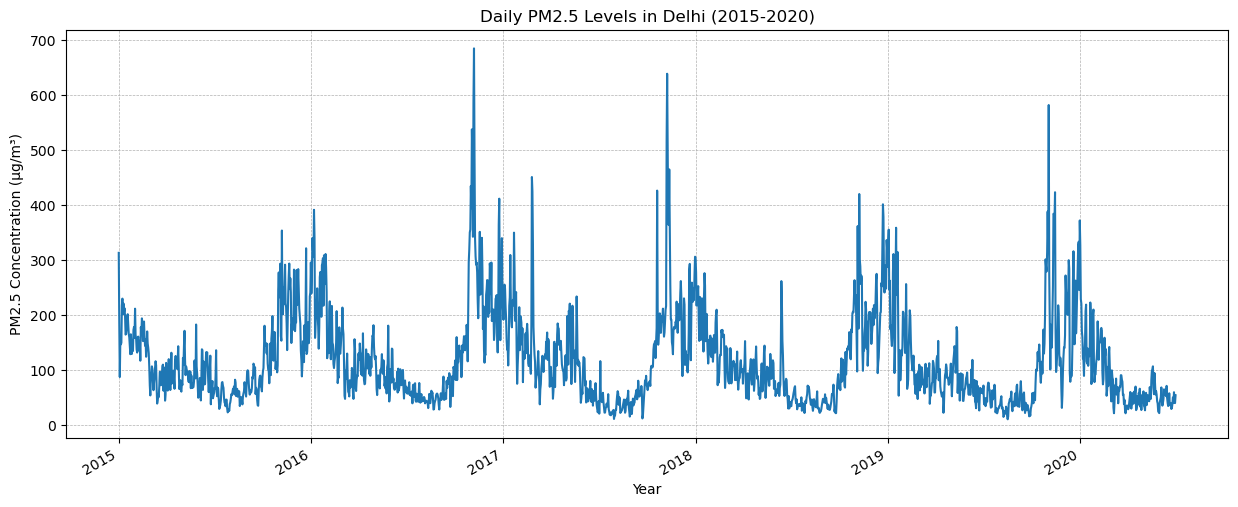

In [27]:

plt.figure(figsize=(15, 6))
aqi_df['PM2.5'].plot(style='-')
plt.title('Daily PM2.5 Levels in Delhi (2015-2020)')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.xlabel('Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

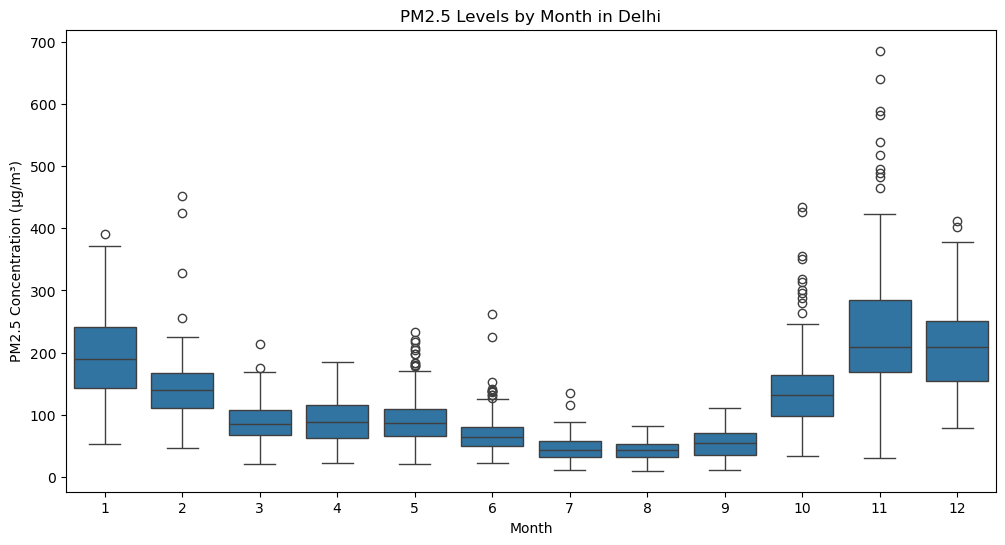

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='PM2.5', data=aqi_df)
plt.title('PM2.5 Levels by Month in Delhi')
plt.xlabel('Month')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.show()

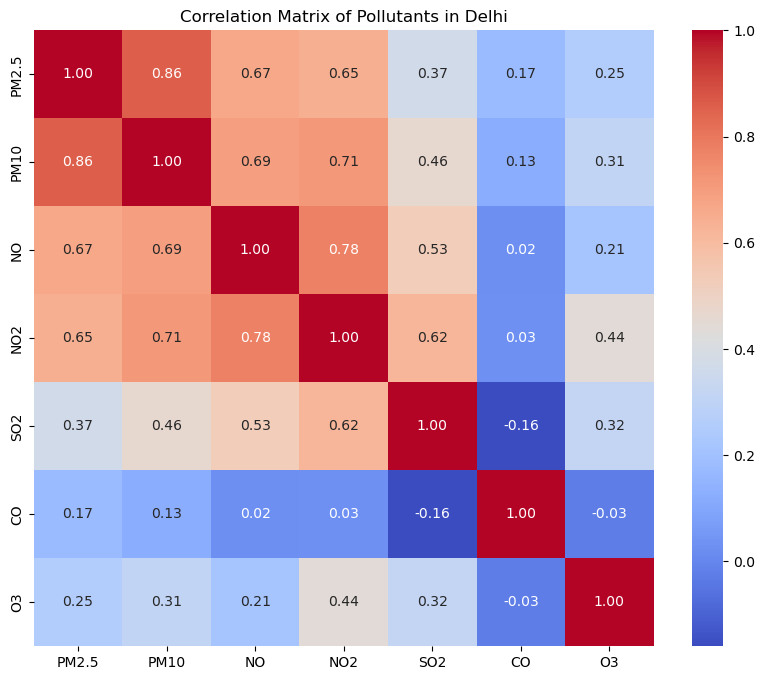

In [23]:
# Select only the pollutant columns for correlation
pollutant_df = aqi_df[['PM2.5', 'PM10', 'NO', 'NO2', 'SO2', 'CO', 'O3']]

# Calculate the correlation matrix
correlation_matrix = pollutant_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pollutants in Delhi')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


df_model = pollutant_df.copy()
df_model['PM2.5_next_day'] = df_model['PM2.5'].shift(-1)

df_model.dropna(inplace=True)

X = df_model[['PM2.5', 'PM10', 'NO2', 'CO']] # Using a few key features
y = df_model['PM2.5_next_day']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
error = mean_absolute_error(y_test, predictions)

print(f" Model training complete.")
print(f"The model can predict the next day's PM2.5 with an average error of: {error:.2f} µg/m³")

 Model training complete.
The model can predict the next day's PM2.5 with an average error of: 24.75 µg/m³
